In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('heart.csv')
print(df)
# df = df.drop(['FastingBS'], axis = 1)
d = 0
k = 0
# We do not need class balancing
for i in df['HeartDisease']:
    if i == 0:
        k = k + 1
    else:
        d = d + 1
print(d)
print(k)
print(df.columns)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [4]:
df['Sex'] = df['Sex'].map({'F' : 0, 'M' : 1})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N' : 0, 'Y' : 1})
# df['ST_Slope'] = df['ST_Slope'].map({'Flat' : 0, 'Up' : 1})
df = pd.get_dummies(df, columns=['ST_Slope'], drop_first = True)         
df = pd.get_dummies(df, columns=['RestingECG'], drop_first = True)         
df = pd.get_dummies(df, columns=['ChestPainType'], drop_first = True)                   
print(df)
print(df.columns)

     Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0     40    1        140          289          0    172               0   
1     49    0        160          180          0    156               0   
2     37    1        130          283          0     98               0   
3     48    0        138          214          0    108               1   
4     54    1        150          195          0    122               0   
..   ...  ...        ...          ...        ...    ...             ...   
913   45    1        110          264          0    132               0   
914   68    1        144          193          1    141               0   
915   57    1        130          131          0    115               1   
916   57    0        130          236          0    174               0   
917   38    1        138          175          0    173               0   

     Oldpeak  HeartDisease  ST_Slope_Flat  ST_Slope_Up  RestingECG_Normal  \
0        0.0          

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop('HeartDisease', axis = 1)
Y = df['HeartDisease']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

print(X_train.shape)
print(y_train.shape)

(688, 15)
(688,)


In [6]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(X_train,y_train)
output = reg.predict(X_test)
output

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [7]:
from sklearn.metrics import r2_score
print(r2_score(y_test,output))

0.4488249845392702


In [8]:
reg.coef_
result = reg.coef_.flatten()
print(reg.coef_)

[[ 0.13868068  0.51333177  0.03728592 -0.50223682  0.43186913 -0.06555229
   0.53197192  0.45556001  0.73392951 -0.48566749 -0.06970817 -0.15785782
  -0.58761307 -0.6211495  -0.26678475]]


In [10]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
X_train_sm
view = sm.OLS(y_train,X_train_sm).fit()
print(view.summary())

                            OLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     61.05
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          1.45e-114
Time:                        17:17:55   Log-Likelihood:                -200.57
No. Observations:                 688   AIC:                             433.1
Df Residuals:                     672   BIC:                             505.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5400      0.013     43.057      0.0

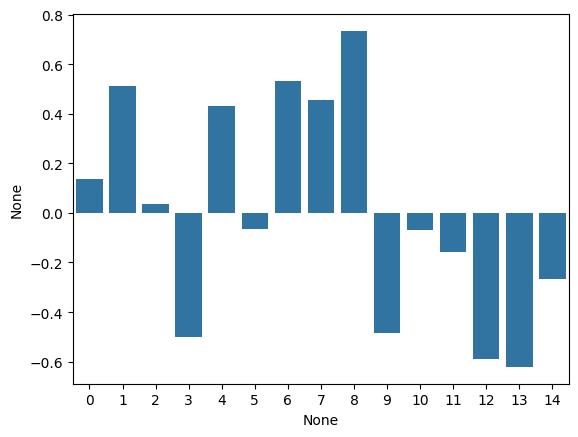

HeartDisease


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
result = pd.Series(result)
# Creating a bar plot
sns.barplot(y=result, x= result.index)
plt.show()
lista = df.columns
def tradu(num):
    print(lista[num])
tradu(8)

0.23546691403834263


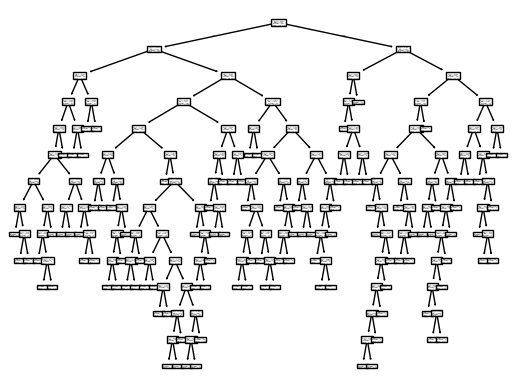

In [12]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
output1 = clf.predict(X_test)
tree.plot_tree(clf)
output1
print(r2_score(y_test,output1))

In [13]:
from sklearn.neighbors import KNeighborsClassifier
print(X_train.shape)
neigh1 = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
output3 = neigh1.predict(X_test)
print(r2_score(y_test,output3))

(688, 15)
0.4488249845392702


In [14]:
from sklearn.ensemble import RandomForestClassifier
regr = RandomForestClassifier(max_depth = 3, random_state=0).fit(X_train,y_train)
output4 = regr.predict(X_test)
print(r2_score(y_test,output4))


0.3421459492888065


In [15]:
from sklearn.naive_bayes import BernoulliNB
ber = BernoulliNB().fit(X_train,y_train)
output6 = ber.predict(X_test)
print(r2_score(y_test,output6))

0.3065862708719852


In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df.drop('HeartDisease', axis = 1)
Y = df['HeartDisease']
X_train11, X_test11, y_train11, y_test11 = train_test_split(X,Y,test_size=0.25,random_state=42)
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
X_train11 = scaler.fit_transform(X_train11)
X_test11 = scaler.transform(X_test11)
ml = MultinomialNB().fit(X_train11,y_train11)
output5 = ml.predict(X_test11)
print(r2_score(y_test11,output5))


0.3065862708719852


In [18]:
import pandas as pd
df2 = pd.read_csv('UsedCars_Delhi.csv')
print(df2)
df2 = df2.dropna()

     Unnamed: 0  year          brand  \
0             0  2019           Tata   
1             1  2013        Hyundai   
2             2  2018  Mercedes-Benz   
3             3  2014          Honda   
4             4  2018           Jeep   
..          ...   ...            ...   
241         241  2016          Honda   
242         242  2012          Honda   
243         243  2010  Maruti Suzuki   
244         244  2013  Mercedes-Benz   
245         245  2019       Mahindra   

                                       full_model_name model_name      price  \
0                               Tata Tiago Revotron XZ      Tiago   475000.0   
1                    Hyundai Verna Fluidic 1.6 VTVT SX      Verna   450000.0   
2    Mercedes-Benz E-Class E 350 d Exclusive [2017-...    E-Class  5175000.0   
3                                      Honda Brio S MT       Brio   300000.0   
4      Jeep Compass Limited Plus Petrol AT [2018-2020]    Compass  1650000.0   
..                                     

In [19]:
df2 = df2.drop(['brand','model_name','full_model_name'], axis = 1)
df2['fuel_type'] = df2['fuel_type'].map({'Petrol' : 0, 'Diesel' : 1})
df2 = pd.get_dummies(df2, columns=['city'], drop_first = True)  
lista = df2.columns

df2

,Unnamed: 0,year,price,distance_travelled(kms),fuel_type,city_Dehradun,city_Delhi,city_Faridabad,city_Ghaziabad,city_Lucknow,city_Noida,city_Panchkula
0,0,2019,475000.0,11733.0,0.0,False,True,False,False,False,False,False
1,1,2013,450000.0,41931.0,0.0,False,True,False,False,False,False,False
2,2,2018,5175000.0,14880.0,1.0,False,True,False,False,False,False,False
3,3,2014,300000.0,41606.0,0.0,False,False,False,False,False,True,False
4,4,2018,1650000.0,16000.0,0.0,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
241,241,2016,435000.0,52000.0,0.0,False,True,False,False,False,False,False
242,242,2012,425000.0,80000.0,0.0,False,True,False,False,False,False,False
243,243,2010,225000.0,72000.0,0.0,False,False,False,True,False,False,False
244,244,2013,2650000.0,68000.0,1.0,False,False,True,False,False,False,False


In [20]:
from sklearn.model_selection import train_test_split
x = df2.drop('price', axis = 1)
x.fillna(method = 'ffill', inplace = True)
y = df2['price']
y = y.dropna()
print(x.shape)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x,y,random_state = 10, test_size = 0.25)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)
print(X_train2.min(axis = 0))

(246, 11)
[-1.70862787 -3.25276146 -0.7810634  -1.         -0.32929278 -1.78376517
 -0.10482848 -0.21320072 -0.16713157 -0.23973165  0.        ]


/tmp/ipykernel_6555/2322753194.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x.fillna(method = 'ffill', inplace = True)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
print(df2.shape)
reg2 = LinearRegression().fit(X_train2,y_train2)
output22 = reg2.predict(X_test2)
print(r2_score(y_test2,output22))

(246, 12)
0.3630475335257387


In [22]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3).fit(X_train2,y_train2)
output33 = neigh.predict(X_test2)
print(r2_score(y_test2,output33))

0.04998814886084846


In [23]:
from sklearn.ensemble import RandomForestRegressor
regr1 = RandomForestRegressor(max_depth = 3, random_state=0).fit(X_train2,y_train2)
output44 = regr1.predict(X_test2)
print(r2_score(y_test2,output44))

0.4004637236973948


In [24]:
from sklearn import tree

clf1 = tree.DecisionTreeRegressor()
clf1.fit(X_train2,y_train2)
output11 = clf1.predict(X_test2)
print(r2_score(y_test2,output11))

-1.724832934217459


In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# rms = mean_squared_error(y_actual, y_predicted, squared=False)
print(mean_squared_error(y_test2,output11))
print(mean_absolute_error(y_test2,output11))
print(mean_squared_error(y_test2,output11,squared=False))
list9 = [mean_squared_error(y_test2,output11),mean_squared_error(y_test2,output44),mean_squared_error(y_test2,output33),mean_squared_error(y_test2,output22)]
print('------------------------------------------')
print(mean_squared_error(y_test2,output44))
print(mean_absolute_error(y_test2,output44))
print(mean_squared_error(y_test2,output44,squared=False))
list8 = [mean_absolute_error(y_test2,output11),mean_absolute_error(y_test2,output44),mean_absolute_error(y_test2,output33),mean_absolute_error(y_test2,output22)]
print('------------------------------------------')
print(mean_squared_error(y_test2,output33))
print(mean_absolute_error(y_test2,output33))
print(mean_squared_error(y_test2,output33,squared=False))
list7 =  [mean_squared_error(y_test2,output11,squared=False),mean_squared_error(y_test2,output44,squared=False),mean_squared_error(y_test2,output33,squared=False),mean_squared_error(y_test2,output22,squared=False)]
print('------------------------------------------')
print(mean_squared_error(y_test2,output22))
print(mean_absolute_error(y_test2,output22))
print(mean_squared_error(y_test2,output22,squared=False))


11147254826612.902
2104733.870967742
3338750.4888225626
------------------------------------------
2452694829770.573
1123673.5174628592
1566108.1794596992
------------------------------------------
3886485685035.8423
1175911.2903225808
1971417.1768136348
------------------------------------------
2605763959714.9536
1249381.7201186721
1614237.8882045092


/home/cristian/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/cristian/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/cristian/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/cristian/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the r

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,output))
print(accuracy_score(y_test,output1))
print(accuracy_score(y_test,output3))
print(accuracy_score(y_test,output4))
print(accuracy_score(y_test,output5))
print(accuracy_score(y_test,output6))
list1 = [accuracy_score(y_test,output),accuracy_score(y_test,output1),accuracy_score(y_test,output3),accuracy_score(y_test,output4),accuracy_score(y_test,output5),accuracy_score(y_test,output6)]
print('----------------------------------------------')
from sklearn.metrics import precision_score
print(precision_score(y_test,output))
print(precision_score(y_test,output1))
print(precision_score(y_test,output3))
print(precision_score(y_test,output4))
print(precision_score(y_test,output5))
print(precision_score(y_test,output6))
list2 = [precision_score(y_test,output),precision_score(y_test,output1),precision_score(y_test,output3),precision_score(y_test,output4),precision_score(y_test,output5),precision_score(y_test,output6)]
print('----------------------------------------------')
from sklearn.metrics import recall_score
print(recall_score(y_test,output))
print(recall_score(y_test,output1))
print(recall_score(y_test,output3))
print(recall_score(y_test,output4))
print(recall_score(y_test,output5))
print(recall_score(y_test,output6))
list3 = [recall_score(y_test,output),recall_score(y_test,output1),recall_score(y_test,output3),recall_score(y_test,output4),recall_score(y_test,output5),recall_score(y_test,output6)]
print('----------------------------------------------')
from sklearn.metrics import f1_score
print(f1_score(y_test,output))
print(f1_score(y_test,output1))
print(f1_score(y_test,output3))
print(f1_score(y_test,output4))
print(f1_score(y_test,output5))
print(f1_score(y_test,output6))
list4 = [f1_score(y_test,output),f1_score(y_test,output1),f1_score(y_test,output3),f1_score(y_test,output4),f1_score(y_test,output5),f1_score(y_test,output6)]


0.8652173913043478
0.8130434782608695
0.8652173913043478
0.8391304347826087
0.8304347826086956
0.8304347826086956
----------------------------------------------
0.904
0.8345864661654135
0.9243697478991597
0.8571428571428571
0.872
0.8780487804878049
----------------------------------------------
0.8560606060606061
0.8409090909090909
0.8333333333333334
0.8636363636363636
0.8257575757575758
0.8181818181818182
----------------------------------------------
0.8793774319066148
0.8377358490566038
0.8764940239043825
0.8603773584905661
0.8482490272373541
0.8470588235294118


In [27]:
regression_dic = {
    'Estimator':['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier','RandomForestClassifier','MultinomialNB','BernoulliNB'],
    'Accuracy':list1,
    'Precision':list2,
    'Recall':list3,
    'F1_score':list4
}
table = pd.DataFrame(regression_dic)
table

,Estimator,Accuracy,Precision,Recall,F1_score
0,LogisticRegression,0.865217,0.904000,0.856061,0.879377
1,DecisionTreeClassifier,0.813043,0.834586,0.840909,0.837736
2,KNeighborsClassifier,0.865217,0.924370,0.833333,0.876494
3,RandomForestClassifier,0.839130,0.857143,0.863636,0.860377
4,MultinomialNB,0.830435,0.872000,0.825758,0.848249
5,BernoulliNB,0.830435,0.878049,0.818182,0.847059


In [28]:
clasification_dic = {
    'Estimator':['DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','Linear Regression'],
    'MAE':list8,
    'MSE':list9,
    'RMSE':list7
}
table2 = pd.DataFrame(clasification_dic)
table2

,Estimator,MAE,MSE,RMSE
0,DecisionTreeRegressor,2.104734e+06,1.114725e+13,3.338750e+06
1,RandomForestRegressor,1.123674e+06,2.452695e+12,1.566108e+06
2,KNeighborsRegressor,1.175911e+06,3.886486e+12,1.971417e+06
3,Linear Regression,1.249382e+06,2.605764e+12,1.614238e+06


(230, 15)
['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'ST_Slope_Flat', 'ST_Slope_Up', 'RestingECG_Normal', 'RestingECG_ST', 'ChestPainType_ATA', 'ChestPainType_NAP']


PermutationExplainer explainer: 231it [04:14,  1.12s/it]                        


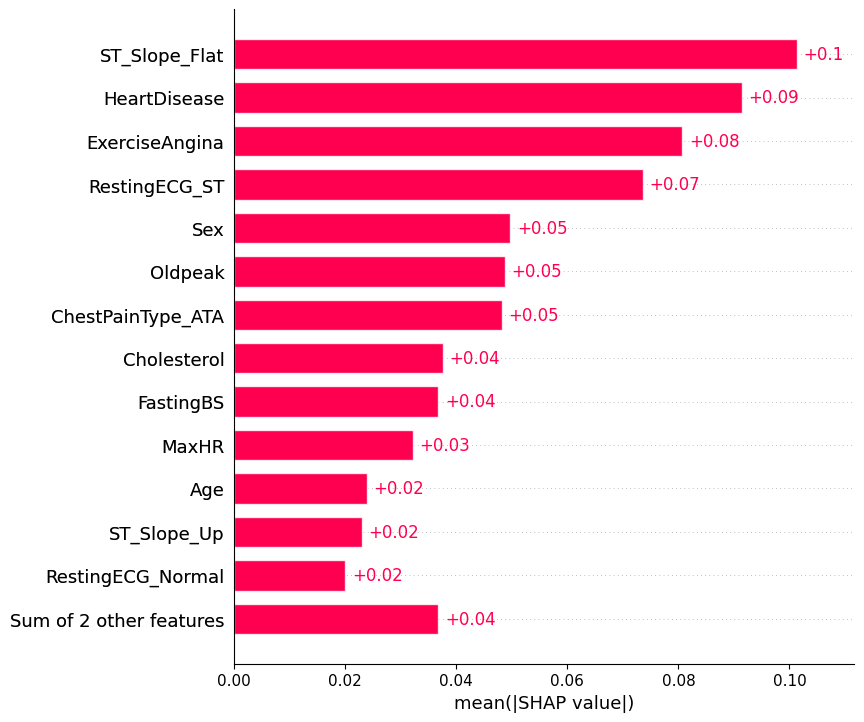

In [30]:
import shap
print(X_test.shape)
print(list(df.columns)[:-1])
shap.initjs()
explainer = shap.Explainer(neigh1.predict, X_train, feature_names = list(df.columns)[:-1])
shap_values = explainer(X_test)
shap.plots.bar(shap_values, max_display=14)

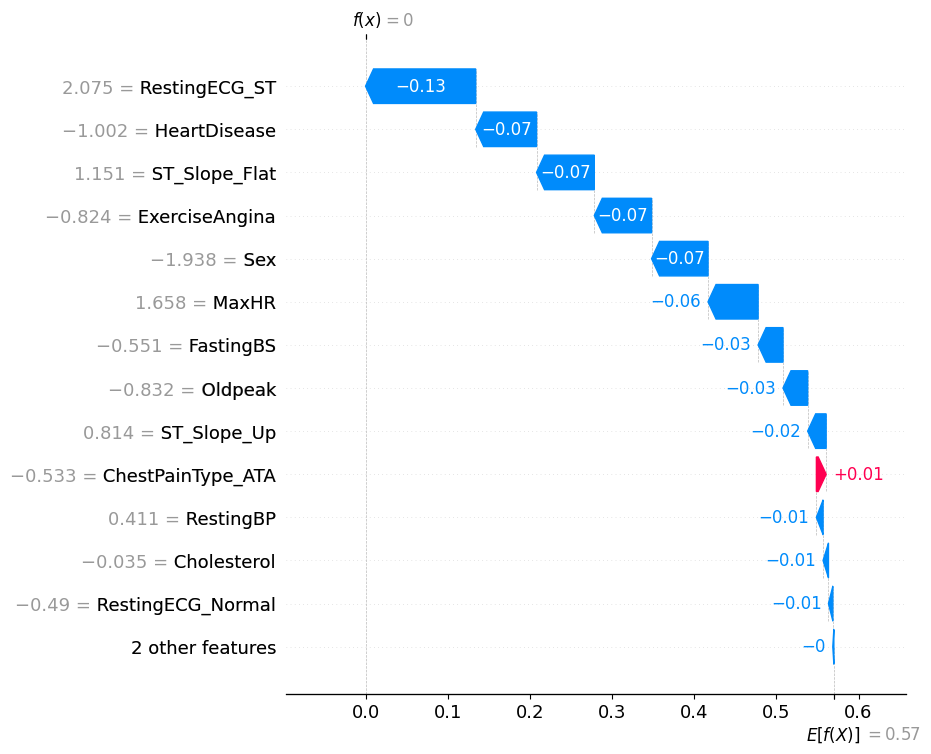

In [31]:
shap.plots.waterfall(shap_values[0], max_display=14)


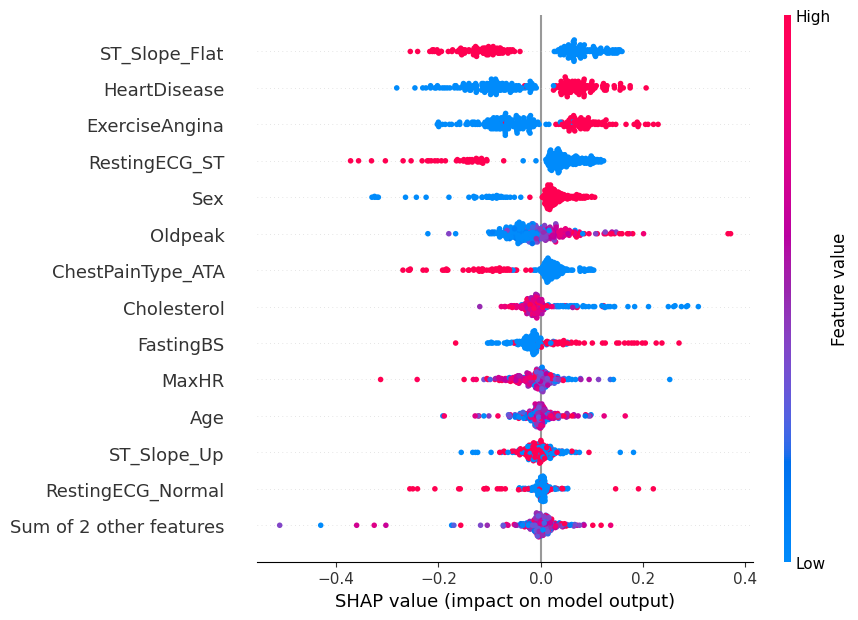

In [32]:
shap.plots.beeswarm(shap_values, max_display=14)

In [33]:
shap.force_plot(shap_values[0], X_test[0])

In [36]:
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names = list(df.iloc[:, :-1].columns), class_names = ['HeartDisease'],categorical_features = ['Sex','FastingBS',
       'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'ST_Slope_Flat',
       'ST_Slope_Up', 'RestingECG_Normal', 'RestingECG_ST',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA'],verbose=True,mode='regression')

exp = explainer.explain_instance(X_test[0], neigh1.predict)
exp.show_in_notebook(show_table=True, show_all=False)

Intercept 0.9652692955882651
Prediction_local [-0.25302489]
Right: 0


In [37]:
df22 = pd.DataFrame(y_test)
print(df22)

     HeartDisease
668             0
30              1
377             1
535             1
807             0
..            ...
259             0
490             1
302             1
7               0
892             0

[230 rows x 1 columns]
